<h1 align="center" style="color:#A3B18A;">Computational Intelligence for Optimization - Project</h1>
<h3 align="center" style="color:#A3B18A;">Group S - Sports League Optimization</h3>

---

### <span style="color:#A3B18A;">Group Members</span>

<table>
  <thead style="color:#A3B18A;">
    <tr>
      <th>Name</th>
      <th>Email</th>
      <th>Student ID</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Gustavo Veloso</td>
      <td>@novaims.unl.pt</td>
      <td></td>
    </tr>
    <tr>
      <td>Leonor Mira</td>
      <td>20240658@novaims.unl.pt</td>
      <td>20240658</td>
    </tr>
    <tr>
      <td>Martim Tavares</td>
      <td>20240508@novaims.unl.pt</td>
      <td>20240508</td>
    </tr>
    <tr>
      <td>Santiago Taylor</td>
      <td>20240542@novaims.unl.pt</td>
      <td>20240542</td>
    </tr>
  </tbody>
</table>



---

<h2 style="color:#A3B18A;">Modelation Notebook</h2>

<p><strong style="color:#A3B18A;">Description:</strong></p>

<p>
This notebook focuses on building, training, and evaluating deep learning models for the classification of species.
</p>

<p>Key steps include:</p>

<ul>
  <li><strong style="color:#A3B18A;">Model Definition:</strong> Design and implement convolutional neural network (CNN) architectures tailored for the dataset.</li>
  <li><strong style="color:#A3B18A;">Compilation and Training: </strong> Compile the models with appropriate loss functions, optimizers, and metrics. Train the models using the preprocessed dataset with callbacks for early stopping and learning rate adjustments.</li>
  <li><strong style="color:#A3B18A;">Evaluation:</strong> Assess the model's performance on validation and test datasets using metrics such as accuracy, loss, and F1 score.</li>
  <li><strong style="color:#A3B18A;">Visualization:</strong> Plot training history to analyze the model's learning behavior, including loss and F1 score curves.</li>
</ul>

<p>
This notebook ensures the development of robust models capable of accurately classifying rare species.
</p>

---

# Tem que se mudar

<a id="toc"></a>

<h2 style="color:#A3B18A;">Table of Contents</h2>

<ul style="list-style-type:none; padding-left:0;">
  <li><span style="color:#A3B18A;">1.</span> <a href="#chapter1">Import the Libraries</a></li>
  <li><span style="color:#A3B18A;">2.</span> <a href="#chapter2">Load the Data</a></li>
  <li><span style="color:#A3B18A;">3.</span> <a href="#chapter3">Genetic Algorithm Functions</a></li>
  
</ul>

---

<h2 id="chapter1" style="color:#A3B18A;">1. Import the Libraries</h2>

<p><a href="#toc" style="color:#A3B18A;">⬅ Back to Table of Contents</a></p>

<p>In this section, we import the necessary libraries required throughout this notebook.</p>

In [ ]:
import sys
sys.path.append('..')

In [ ]:
import random
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from typing import Callable
from copy import deepcopy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2 id="chapter2" style="color:#A3B18A;">2. Load the Data</h2>

<p><a href="#toc" style="color:#A3B18A;">⬅ Back to Table of Contents</a></p>

<p> adicionar descrição</p>


In [ ]:
path_file = '/content/drive/MyDrive/CIFO/CIFO_Project/players(in).csv'

In [ ]:
df = pd.read_csv(path_file, index_col=0)
df

,Name,Position,Skill,Salary (€M)
0,Alex Carter,GK,85,90
1,Jordan Smith,GK,88,100
2,Ryan Mitchell,GK,83,85
3,Chris Thompson,GK,80,80
4,Blake Henderson,GK,87,95
5,Daniel Foster,DEF,90,110
6,Lucas Bennett,DEF,85,90
7,Owen Parker,DEF,88,100
8,Ethan Howard,DEF,80,70
9,Mason Reed,DEF,82,75


<ipython-input-8-e3282106ce26>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Salary (€M)', y='Position', inner='stick', palette='Dark2')


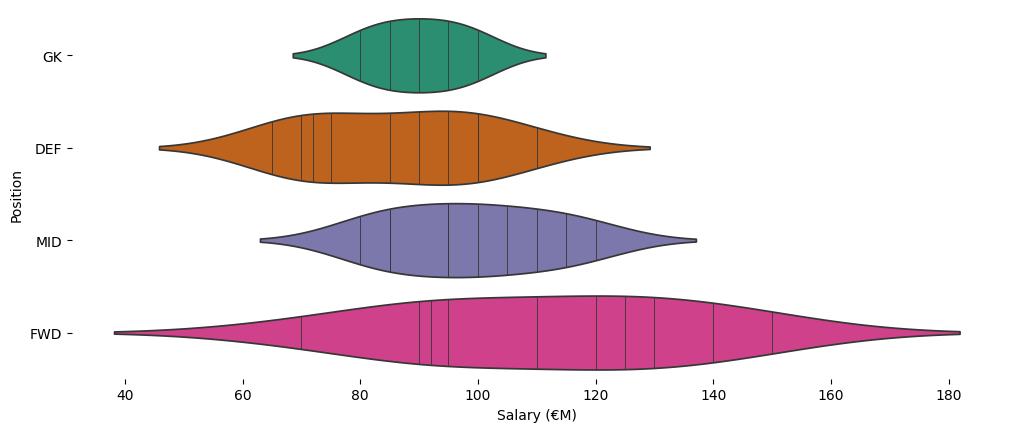

In [ ]:
# @title Position vs Salary (€M)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Position'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Salary (€M)', y='Position', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

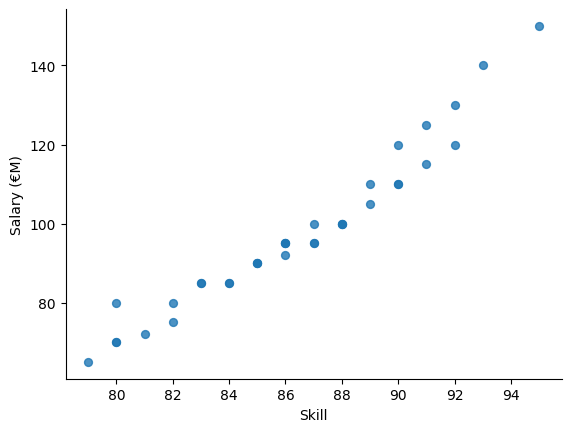

In [ ]:
# @title Skill vs Salary (€M)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Skill', y='Salary (€M)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df[df["Position"] == 'GK']

,Name,Position,Skill,Salary (€M)
0,Alex Carter,GK,85,90
1,Jordan Smith,GK,88,100
2,Ryan Mitchell,GK,83,85
3,Chris Thompson,GK,80,80
4,Blake Henderson,GK,87,95


<h2 id="chapter3" style="color:#A3B18A;">3. Genetic Algorithms Functions</h2>

<p><a href="#toc" style="color:#A3B18A;">⬅ Back to Table of Contents</a></p>

<p> Adicionar descrição</p>

In [ ]:
class Player():

    def __init__(self, player):
        self.name = player["Name"]
        self.position = player["Position"]
        self.skill = player["Skill"]
        self.salary = player["Salary (€M)"]

    def __repr__(self):
        return f"{self.name} - {self.position}"

    # para comparar jogadores com os mesmos dados
    def __eq__(self, other):
        if not isinstance(other, Player):
            return False
        return self.name == other.name and self.position == other.position

    def __hash__(self):  # NAO FACO A MINIMA
        return hash((self.name, self.position))

In [ ]:
class Team():

    def __init__(self, name, budget):

        self.budget = budget
        self.name = name
        self.goalkeepers = []
        self.defenders = []
        self.midfielders = []
        self.forwards = []

    def add_player(self, player):
        if player.position == "GK":
            self.goalkeepers.append(player)
        if player.position == "DEF":
            self.defenders.append(player)
        if player.position == "MID":
            self.midfielders.append(player)
        if player.position == "FWD":
            self.forwards.append(player)

    def total_salary(self):
        return sum([p.salary for p in self.goalkeepers + self.defenders + self.midfielders + self.forwards])

    def average_skill(self):
        return statistics.mean([p.skill for p in self.goalkeepers + self.defenders + self.midfielders + self.forwards])

    def over_budget(self):
        return sum([p.salary for p in self.goalkeepers + self.defenders + self.midfielders + self.forwards]) > self.budget

In [ ]:
class League():

    def __init__(self, crossover_function, mutation_function): # deviamos meter aqui o budget
        self.crossover_function = crossover_function
        self.mutation_function = mutation_function
        self.teams = [
            Team("Team 1", 750),
            Team("Team 2", 750),
            Team("Team 3", 750),
            Team("Team 4", 750),
            Team("Team 5", 750)
        ]

    def valid_league(self):
        players = [p for t in self.teams for p in t.goalkeepers + t.defenders + t.midfielders + t.forwards]
        return len(set(players)) == len(players)


    def allocate_players_from_lists(self, goalkeepers, defenders, midfielders, forwards):
        # Clear teams
        for team in self.teams:
            team.goalkeepers = []
            team.defenders = []
            team.midfielders = []
            team.forwards = []

        for i, team in enumerate(self.teams):
            team.add_player(goalkeepers[i])
            team.add_player(defenders[i * 2])
            team.add_player(defenders[i * 2 + 1])
            team.add_player(midfielders[i * 2])
            team.add_player(midfielders[i * 2 + 1])
            team.add_player(forwards[i * 2])
            team.add_player(forwards[i * 2 + 1])


    def draft_players(self, players):

        # Separate players by position
        goalkeepers = [p for p in players if p.position == "GK"]
        defenders = [p for p in players if p.position == "DEF"]
        midfielders = [p for p in players if p.position == "MID"]
        forwards = [p for p in players if p.position == "FWD"]

        random.shuffle(goalkeepers)
        random.shuffle(defenders)
        random.shuffle(midfielders)
        random.shuffle(forwards)

        self.allocate_players_from_lists(goalkeepers, defenders, midfielders, forwards)


    def show_teams(self):
        for team in self.teams:
            print(f"\n{team.name}")
            for player in team.goalkeepers + team.defenders + team.midfielders + team.forwards:
                print(f"{player.name} - {player.position}")

    def fitness(self):
        std = statistics.stdev([team.average_skill() for team in self.teams])
        over_budget_count = sum(team.over_budget() for team in self.teams)
        return std + over_budget_count


    def player_positions(self):
        player_positions = {
            "GK": [p for t in self.teams for p in t.goalkeepers],
            "DEF": [p for t in self.teams for p in t.defenders],
            "MID": [p for t in self.teams for p in t.midfielders],
            "FWD": [p for t in self.teams for p in t.forwards]
        }
        return player_positions

    #def mutation(self, mut_prob):
        #return self

    def mutation(self, mut_prob):
        player_positions = self.player_positions()

        swap_mutation(player_positions["GK"], mut_prob)
        swap_mutation(player_positions["DEF"], mut_prob)
        swap_mutation(player_positions["MID"], mut_prob)
        swap_mutation(player_positions["FWD"], mut_prob)

        mutated_team = League(self.crossover_function, self.mutation_function)
        mutated_team.allocate_players_from_lists(player_positions["GK"], player_positions["DEF"], player_positions["MID"], player_positions["FWD"])

        return mutated_team


    def crossover(self, other_solution):
        parent1_positions = self.player_positions()
        parent2_positions = other_solution.player_positions()

        offspring1_goalkeepers, offspring2_goalkeepers = self.crossover_function(parent1_positions["GK"], parent2_positions["GK"])
        offspring1_defenders, offspring2_defenders = self.crossover_function(parent1_positions["DEF"], parent2_positions["DEF"])
        offspring1_midfielders, offspring2_midfielders = self.crossover_function(parent1_positions["MID"], parent2_positions["MID"])
        offspring1_forwards, offspring2_forwards = self.crossover_function(parent1_positions["FWD"], parent2_positions["FWD"])

        # Create new leagues and allocate players
        offspring1 = League(self.crossover_function, self.mutation_function)
        offspring1.allocate_players_from_lists(offspring1_goalkeepers, offspring1_defenders, offspring1_midfielders, offspring1_forwards)

        offspring2 = League(self.crossover_function, self.mutation_function)
        offspring2.allocate_players_from_lists(offspring2_goalkeepers, offspring2_defenders, offspring2_midfielders, offspring2_forwards)

        return offspring1, offspring2


In [ ]:
def swap_mutation(repr, mut_prob):

    new_representation = deepcopy(repr)

    if random.random() < mut_prob:
        first_idx = random.randint(0, len(repr) - 1)
        second_idx = first_idx
        while second_idx == first_idx:
            second_idx = random.randint(0, len(repr) - 1)

        new_representation[first_idx] = repr[second_idx]
        new_representation[second_idx] = repr[first_idx]

        return new_representation

In [ ]:
def cycle_crossover(parent1_repr, parent2_repr):
    initial_random_idx = random.randint(0, len(parent1_repr) -1)

    cycle_idxs = [initial_random_idx]
    current_cycle_idx = initial_random_idx

    while True:
        value_parent2 = parent2_repr[current_cycle_idx]

        next_cycle_idx = parent1_repr.index(value_parent2)

        if next_cycle_idx in cycle_idxs:
            break

        cycle_idxs.append(next_cycle_idx)
        current_cycle_idx = next_cycle_idx

    offspring1_repr = []
    offspring2_repr = []

    for idx in range(len(parent1_repr)):
        if idx in cycle_idxs:
            offspring1_repr.append(parent2_repr[idx])
            offspring2_repr.append(parent1_repr[idx])

        else:
            offspring1_repr.append(parent1_repr[idx])
            offspring2_repr.append(parent2_repr[idx])

    if isinstance(parent1_repr, str) and isinstance(parent2_repr, str):
        offspring1_repr = "". join(offspring1_repr)
        offspring2_repr = "". join(offspring2_repr)

    return offspring1_repr, offspring2_repr

In [ ]:
def get_best_ind(population: list[League], maximization: bool):
    fitness_list = [ind.fitness() for ind in population]
    if maximization:
        return population[fitness_list.index(max(fitness_list))]
    else:
        return population[fitness_list.index(min(fitness_list))]

In [ ]:
def fitness_proportionate_selection(population: list[League], maximization: bool):
    # total_fitness = sum([ind.fitness() for ind in population])

    if maximization:
        fitness_values = [ind.fitness() for ind in population]
    else:
        # Minimization: Use the inverse of the fitness value
        # Lower fitness should have higher probability of being selected
        fitness_values = [1 / ind.fitness() for ind in population]

    total_fitness = sum(fitness_values)
    # Generate random number between 0 and total
    random_nr = random.uniform(0, total_fitness)
    box_boundary = 0
    # For each individual, check if random number is inside the individual's "box"
    for ind_idx, ind in enumerate(population):
        box_boundary += fitness_values[ind_idx]
        if random_nr <= box_boundary:
            return deepcopy(ind)

In [ ]:
def genetic_algorithm(
    initial_population: list[League],   # MUDAR ISTO PARA LISTA DE SOLUTION
    max_gen: int,
    selection_algorithm: Callable,
    maximization: bool = False,
    xo_prob: float = 0.9,
    mut_prob: float = 0.1,
    elitism: bool = True,
    verbose: bool = False,
    ):

    population = initial_population
    fitness_list = []

    for gen in range(1, max_gen + 1):
        if verbose:
            print(f"------------ Generation {gen} ------------")

        new_population = []

        if elitism:
            new_population.append(deepcopy(get_best_ind(initial_population, maximization)))

        while len(new_population) < len(population):
            first_ind = selection_algorithm(population, maximization)
            second_ind = selection_algorithm(population, maximization)

            if verbose:
                print(f"Selected Individuals: \n{first_ind}\n{second_ind}")

            if random.random() < xo_prob:
                offspring1, offspring2 = first_ind.crossover(second_ind)
                if verbose:
                    print("Applied Crossover")
            else:
                offspring1, offspring2 = deepcopy(first_ind), deepcopy(second_ind)
                if verbose:
                    print("Not Applied Replication")

            if verbose:
                print(f"Offspring 1: {offspring1}\n{offspring2}")

            first_new_ind = offspring1.mutation(mut_prob)
            new_population.append(first_new_ind)

            new_population.append(offspring1)

            if verbose:
                print(f"First mutated individual: {first_new_ind}")

            if len(new_population) < len(population):
                second_new_ind = offspring2.mutation(mut_prob)
                new_population.append(second_new_ind)
                if verbose:
                    print(f"Second mutated individual: {second_new_ind}")

        population = new_population
        fitness_list.append(get_best_ind(population, maximization).fitness())

        if verbose:
            print(f"Final Best Individual in Generation: {get_best_ind(population, maximization)}")

    return get_best_ind(population, maximization), fitness_list


In [ ]:
POP_SIZE = 50
initial_population = []


for _ in range(POP_SIZE):
    players = [Player(row) for _, row in df.iterrows()]
    league = League(cycle_crossover, swap_mutation)
    league.draft_players(players)
    initial_population.append(league)

best_solution = genetic_algorithm(
    initial_population=initial_population,
    max_gen=200,
    selection_algorithm=fitness_proportionate_selection,
    maximization=False,
    mut_prob=0.1,
    verbose=False
)

print("Best solution:", best_solution)
print("Fitness:", best_solution[0].fitness())
print("Fitness List:", best_solution[1])


# Create a line plot
plt.plot(best_solution[1], marker='o', linestyle='-', color='b')

# Optional: Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot from List')

# Show the plot
plt.show()

In [ ]:
best_solution[0].show_teams()

In [ ]:
for team in best_solution[0].teams:
    print(team.average_skill())
    print(team.total_salary())